# <font color='blue'>       New York City Taxi Fare Prediction: Data Analysis & Model Building

# <font color='blue'> Description:
#### In this project, we're looking to predict the fare for the New York city's taxi future transactional cases. Taxis delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

#### The datset contains the following fields:


➡ key - Unique ID field. (Not necessarily needed in the training set)

➡ fare_amount - the cost of each trip in USD

➡ pickup_datetime - date and time when the meter was engaged

➡ passenger_count - the number of passengers in the vehicle

➡ pickup_longitude - the longitude where the meter was engaged

➡ pickup_latitude - the latitude where the meter was engaged

➡ dropoff_longitude - the longitude where the meter was disengaged

➡ dropoff_latitude - the latitude where the meter was disengaged

➡ pickup_datetime - timestamp value indicating when the taxi ride started.




# <font color='blue'> About Dataset:
#### The dataset used is a record of taxi trips in the New York City.

#### This workbook is the New York City Taxi Fare Prediction competition dataset referred from Kaggle.

# <font color='blue'> Problem statement

#### Predicting the fare amount for a taxi ride in the New York City.

# <font color='blue'> Objective

#### ➡ This is a Supervised Learning regression problem.

####➡ Our objective is to understand the Dataset & do the Data Preprocessing (if required).

####➡ Build a model that will accurately predict the fare amount.

####➡ The evaluation metric for this competition is the root mean-squared error(RMSE).
#### A large RMSE is equivalent to a large average error, so smaller values of RMSE are better.

# <font color='blue'> Content of the file:

 ### ➡ Introduction: Taxi Fare Prediction

 ### ➡ Data Preprocessing
 
 ### ➡ EDA

 ### ➡ Data Visualization

 ### ➡ Splitting into Train and Test data

 ### ➡ Machine Learning Model building
      
   *   XGBoost Regressor
   *   Random Forest Regressor
   *   Linear Regression
   *   Ridge & Lasso Regressor

### ➡ Hyperparameter Tuning

 ### ➡ Evaluation Comparison

 ### ➡ Project Outcomes & Conclusions

# <font color='blue'> 1) Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import cos,sqrt,asin,pi
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from scipy.stats import norm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from scipy.stats import jarque_bera
from scipy import stats
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from scipy.stats import bartlett
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
from matplotlib.pyplot import figure
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <font color='blue'> 2) Load the dataset
#### We will be working on 100,000 records 


In [ ]:
path='/content/drive/MyDrive/NYC_Taxi.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NYC_Taxi.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
data.shape

(100000, 9)

In [ ]:
data.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

# <font color='blue'> 3) Convert into DataFrame

In [ ]:
df_data=pd.DataFrame(data)
df_data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### Data preparation is an important process of cleaning and transforming raw data prior to building predictive models.


# <font color='blue'> 4) Drop unwanted columns

In [ ]:
df_data=df_data.drop(['key'],axis=1)

In [ ]:
df_data=df_data.drop(['Unnamed: 0'],axis=1)
df_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# <font color='blue'> 5) Adding new features
### Obtaining day, day of week, week, hour, minute, and month features from 'pickup_datetime' feature

In [ ]:
def time_features(df_data,time_col):
    df_data[time_col] = pd.to_datetime(df_data[time_col])
    df_data['day'] = pd.to_datetime(df_data[time_col]).dt.day
    df_data['dayofweek'] = pd.to_datetime(df_data[time_col]).dt.dayofweek
    df_data['hour'] = pd.to_datetime(df_data[time_col]).dt.hour
    df_data['minute'] = pd.to_datetime(df_data[time_col]).dt.minute
    df_data['month'] = pd.to_datetime(df_data[time_col]).dt.month
    return df_data

In [ ]:
time_features(df_data, 'pickup_datetime')
df_data.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,month
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,0,17,26,6
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,16,52,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,3,0,35,8
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,5,4,30,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,1,7,51,3


## <font color='blue'> Calculating Distance (in mile) using Longitude and Latitude

### *NOTE* : 1 mile = 1.60934 Km

In [ ]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
df_data["distance_miles"] = distance(df_data["pickup_latitude"], df_data["pickup_longitude"], 
                                      df_data["dropoff_latitude"], df_data["dropoff_longitude"])

df_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,month,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,0,17,26,6,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,16,52,1,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,3,0,35,8,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,5,4,30,4,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,1,7,51,3,1.242218


### We can drop the pickup_datetime column as we have extracted the information from it into another columns.

In [ ]:
df_data=df_data.drop('pickup_datetime',axis=1)

df_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,month,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,0,17,26,6,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,16,52,1,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,3,0,35,8,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,5,4,30,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,1,7,51,3,1.242218


# <font color='blue'> 5) Removing invalid records 
### New York city co-ordinates 👉 lat = (40.2940 , 45.0042), lon = (71.4725 , 79.4554)

In [ ]:
# removing invalid coordinates

df_data = df_data[df_data['pickup_longitude'] <= -71.4725]
df_data = df_data[df_data['pickup_longitude'] >= -79.4554]

df_data = df_data[df_data['pickup_latitude'] <= 45.0042]
df_data = df_data[df_data['pickup_latitude'] >= 40.2940]

df_data = df_data[df_data['dropoff_longitude'] <= -71.4725]
df_data = df_data[df_data['dropoff_longitude'] >= -79.4554]

df_data = df_data[df_data['dropoff_latitude'] <= 45.0042]
df_data = df_data[df_data['dropoff_latitude'] >= 40.2940]

df_data.shape

(97891, 12)

In [ ]:
# Delete rows that have fare price less or equal to 0

drop_fare_amount = df_data[df_data.fare_amount < 0].index
df_data = df_data.drop(drop_fare_amount)

In [ ]:
df_data.passenger_count.value_counts()

1    68099
2    14290
5     6876
3     4214
4     2042
6     2004
0      358
Name: passenger_count, dtype: int64

In [ ]:
# Deleting rows where passenger_count == 0 

drop_passenger_count_0=df_data[(df_data.passenger_count == 0)].index
df_data = df_data.drop(drop_passenger_count_0)


# <font color='blue'> 6) Rounding upto 4 decimal place

In [ ]:
df_data.pickup_longitude  = round(df_data.pickup_longitude.astype(float),4)
df_data.pickup_latitude   = round(df_data.pickup_latitude.astype(float),4)
df_data.dropoff_longitude = round(df_data.dropoff_longitude.astype(float),4)
df_data.dropoff_latitude  = round(df_data.dropoff_latitude.astype(float),4)
df_data.distance_miles= round(df_data.distance_miles.astype(float),4)
df_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,month,distance_miles
0,4.5,-73.8443,40.7213,-73.8416,40.7123,1,15,0,17,26,6,0.6405
1,16.9,-74.0160,40.7113,-73.9793,40.7820,1,5,1,16,52,1,5.2507
2,5.7,-73.9827,40.7613,-73.9912,40.7506,2,18,3,0,35,8,0.8634
3,7.7,-73.9871,40.7331,-73.9916,40.7581,1,21,5,4,30,4,1.7394
4,5.3,-73.9681,40.7680,-73.9567,40.7838,1,9,1,7,51,3,1.2422


# <font color='blue'> 7) Check for the duplicate records

In [ ]:
df_data.duplicated().sum()

0

###👉 No duplicate records found.

# <font color='blue'> 8) Checking for the missing values

In [ ]:
Total = df_data.isnull().sum().sort_values(ascending=False) 

Percent = (df_data.isnull().sum()*100/df_data.isnull().count()).sort_values(ascending=False)  

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data


,Total,Percentage of Missing Values
fare_amount,0,0.0
pickup_longitude,0,0.0
pickup_latitude,0,0.0
dropoff_longitude,0,0.0
dropoff_latitude,0,0.0
passenger_count,0,0.0
day,0,0.0
dayofweek,0,0.0
hour,0,0.0
minute,0,0.0


### 👉 No missing records found.

# <font color='blue'> 9) Check for the Outliers

In [ ]:
num_columns=df_data.select_dtypes(exclude='object')

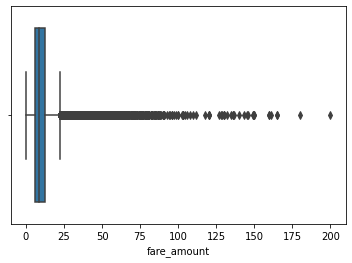

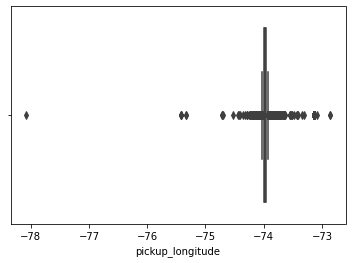

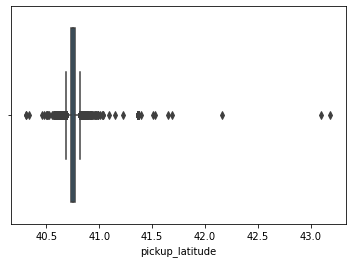

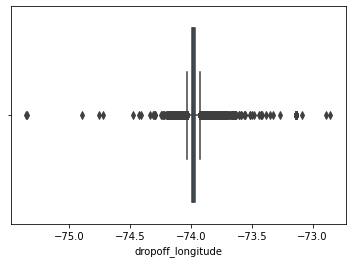

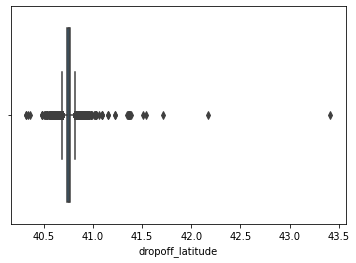

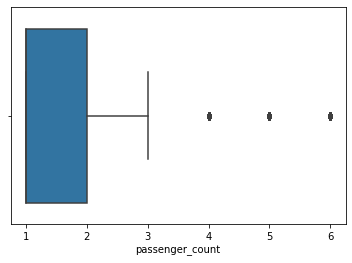

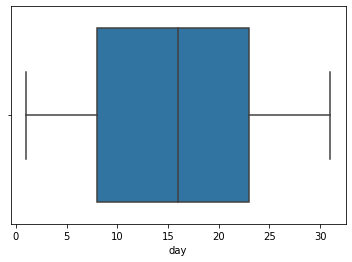

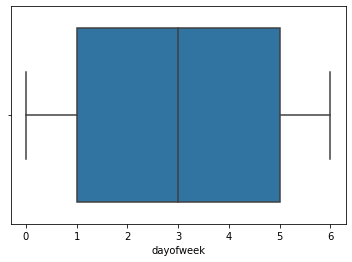

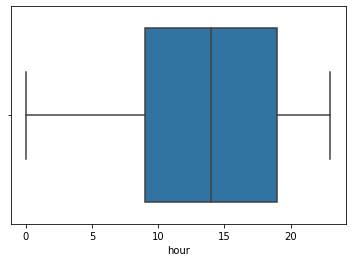

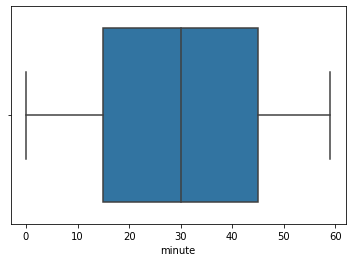

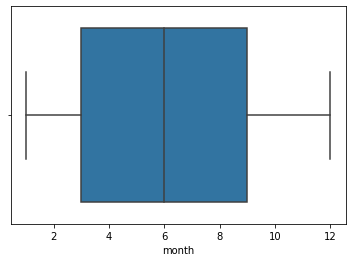

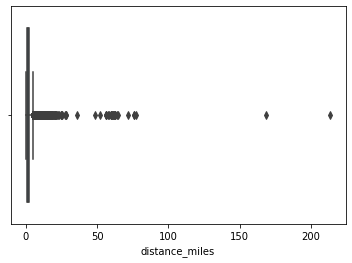

In [ ]:
for i in num_columns.columns:
    sns.boxplot(num_columns[i])
    plt.show()

## <font color='blue'> 10) Outlier Removal by IQR method

### fare_amount

In [ ]:
fare_amount_q1=df_data['fare_amount'].quantile(0.25)
fare_amount_q2=df_data['fare_amount'].quantile(0.50)
fare_amount_q3=df_data['fare_amount'].quantile(0.75)

fare_amount_IQR = fare_amount_q3-fare_amount_q1
fare_amount_IQR

6.5

In [ ]:
fare_amount_lower_limit = fare_amount_q1 - 1.5*fare_amount_IQR
fare_amount_upper_limit = fare_amount_q3 + 1.5*fare_amount_IQR

fare_amount_lower_limit ,fare_amount_upper_limit

(-3.75, 22.25)

In [ ]:
fare_amount_outliers=df_data['fare_amount'][(df_data['fare_amount']<fare_amount_lower_limit)|(df_data['fare_amount']>fare_amount_upper_limit)]

len(fare_amount_outliers)

8476

### pickup_longitude

In [ ]:
pickup_longitude_q1=df_data['pickup_longitude'].quantile(0.25)
pickup_longitude_q2=df_data['pickup_longitude'].quantile(0.50)
pickup_longitude_q3=df_data['pickup_longitude'].quantile(0.75)

pickup_longitude_IQR = pickup_longitude_q3-pickup_longitude_q1
pickup_longitude_IQR

0.02400000000000091

In [ ]:
pickup_longitude_lower_limit = pickup_longitude_q1 - 1.5*pickup_longitude_IQR
pickup_longitude_upper_limit = pickup_longitude_q3 + 1.5*pickup_longitude_IQR

pickup_longitude_lower_limit,pickup_longitude_upper_limit

(-74.0283, -73.9323)

In [ ]:
pickup_longitude_outliers=df_data['pickup_longitude'][(df_data['pickup_longitude']<pickup_longitude_lower_limit)|(df_data['pickup_longitude']>pickup_longitude_upper_limit)]

len(pickup_longitude_outliers)

4958

### pickup_latitude

In [ ]:
pickup_latitude_q1=df_data['pickup_latitude'].quantile(0.25)
pickup_latitude_q2=df_data['pickup_latitude'].quantile(0.50)
pickup_latitude_q3=df_data['pickup_latitude'].quantile(0.75)

pickup_latitude_IQR = pickup_latitude_q3-pickup_latitude_q1
pickup_latitude_IQR

0.030999999999998806

In [ ]:
pickup_latitude_lower_limit = pickup_latitude_q1 - 1.5*pickup_latitude_IQR
pickup_latitude_upper_limit = pickup_latitude_q3 + 1.5*pickup_latitude_IQR

pickup_latitude_lower_limit,pickup_latitude_upper_limit

(40.690200000000004, 40.8142)

In [ ]:
pickup_latitude_outliers=df_data['pickup_latitude'][(df_data['pickup_latitude']<pickup_latitude_lower_limit)|(df_data['pickup_latitude']>pickup_latitude_upper_limit)]

In [ ]:
len(pickup_latitude_outliers)

3026

### dropoff_longitude

In [ ]:
dropoff_longitude_q1=df_data['dropoff_longitude'].quantile(0.25)
dropoff_longitude_q2=df_data['dropoff_longitude'].quantile(0.50)
dropoff_longitude_q3=df_data['dropoff_longitude'].quantile(0.75)

dropoff_longitude_IQR = dropoff_longitude_q3-dropoff_longitude_q1
dropoff_longitude_IQR

0.026299999999991996

In [ ]:
dropoff_longitude_lower_limit = dropoff_longitude_q1 - 1.5*dropoff_longitude_IQR
dropoff_longitude_upper_limit = dropoff_longitude_q3 + 1.5*dropoff_longitude_IQR

dropoff_longitude_lower_limit,dropoff_longitude_upper_limit

(-74.03084999999999, -73.92565000000002)

In [ ]:
dropoff_longitude_outliers=df_data['dropoff_longitude'][(df_data['dropoff_longitude']<dropoff_longitude_lower_limit)|(df_data['dropoff_longitude']>dropoff_longitude_upper_limit)]

len(dropoff_longitude_outliers)

5519

### dropoff_latitude

In [ ]:
dropoff_latitude_q1=df_data['dropoff_latitude'].quantile(0.25)
dropoff_latitude_q2=df_data['dropoff_latitude'].quantile(0.50)
dropoff_latitude_q3=df_data['dropoff_latitude'].quantile(0.75)

dropoff_latitude_IQR =dropoff_latitude_q3-dropoff_latitude_q1
dropoff_latitude_IQR

0.0327000000000055

In [ ]:
dropoff_latitude_lower_limit = dropoff_latitude_q1 - 1.5*dropoff_latitude_IQR
dropoff_latitude_upper_limit = dropoff_latitude_q3 + 1.5*dropoff_latitude_IQR

dropoff_latitude_lower_limit ,dropoff_latitude_upper_limit 

(40.68674999999999, 40.81755000000001)

In [ ]:
dropoff_latitude_outliers=df_data['dropoff_latitude'][(df_data['dropoff_latitude']<dropoff_latitude_lower_limit)|(df_data['dropoff_latitude']>dropoff_latitude_upper_limit)]

len(dropoff_latitude_outliers)

4546

### passenger_count

In [ ]:
passenger_count_q1=df_data['passenger_count'].quantile(0.25)
passenger_count_q2=df_data['passenger_count'].quantile(0.50)
passenger_count_q3=df_data['passenger_count'].quantile(0.75)

passenger_count_IQR =passenger_count_q3-passenger_count_q1
passenger_count_IQR

1.0

In [ ]:
passenger_count_lower_limit = passenger_count_q1 - 1.5*passenger_count_IQR
passenger_count_upper_limit =passenger_count_q3 + 1.5*passenger_count_IQR

passenger_count_lower_limit,passenger_count_upper_limit 

(-0.5, 3.5)

In [ ]:
passenger_count_outliers=df_data['passenger_count'][(df_data['passenger_count']<passenger_count_lower_limit)|(df_data['passenger_count']>passenger_count_upper_limit)]

len(passenger_count_outliers)

10922

## <font color='blue'> 11) Removal of the outliers 

In [ ]:
def remove_outliers(df_data):
    return df_data[(df_data['fare_amount'] >= -3.75) & 
              (df_data['fare_amount'] <= 22.25) &
              (df_data['pickup_longitude'] >= -74.0283) & 
              (df_data['pickup_longitude'] <= -73.9323) & 
              (df_data['dropoff_longitude'] >= -74.03084999999999) &
              (df_data['dropoff_longitude'] <= -73.92565000000002) & 
              (df_data['pickup_latitude'] >= 40.690200000000004) & 
              (df_data['pickup_latitude'] <=  40.8142) & 
              (df_data['dropoff_latitude'] >=40.68674999999999) & 
              (df_data['dropoff_latitude'] <=  40.81755000000001) & 
              (df_data['passenger_count'] >= -0.5) & 
              (df_data['passenger_count'] <= 3.5)]


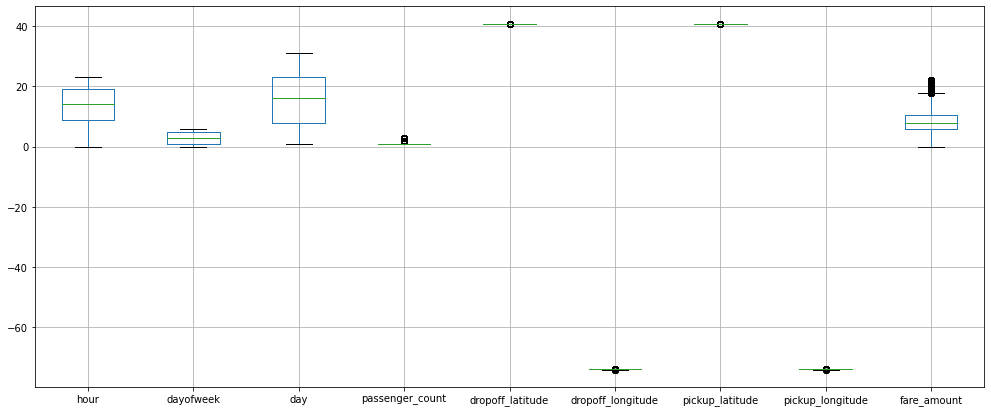

In [ ]:
df_data = remove_outliers(df_data)

df_data.boxplot(column=['hour', 'dayofweek','day', 'passenger_count', 'dropoff_latitude','dropoff_longitude','pickup_latitude','pickup_longitude','fare_amount'])
plt.rcParams['figure.figsize']=(17,7)

In [ ]:
df_data.shape

(74546, 12)

#### 👉 We have total 74546 records after the data preprocessing .

## <font color='blue'> 12) Descriptive statistics

In [ ]:
df_data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,month,distance_miles
1,16.9,-74.0160,40.7113,-73.9793,40.7820,1,5,1,16,52,1,5.2507
2,5.7,-73.9827,40.7613,-73.9912,40.7506,2,18,3,0,35,8,0.8634
3,7.7,-73.9871,40.7331,-73.9916,40.7581,1,21,5,4,30,4,1.7394
4,5.3,-73.9681,40.7680,-73.9567,40.7838,1,9,1,7,51,3,1.2422
5,12.1,-74.0010,40.7316,-73.9729,40.7582,1,6,3,9,50,1,2.3533
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,11.7,-73.9892,40.7413,-73.9541,40.7843,2,24,2,21,4,11,3.4928
99994,5.7,-73.9904,40.7516,-73.9836,40.7441,1,16,4,9,41,9,0.6305
99996,6.0,-73.9629,40.7991,-73.9742,40.7865,1,15,3,12,15,5,1.0523
99997,5.0,-73.9968,40.7235,-73.9920,40.7247,1,19,3,17,40,2,0.2641


In [ ]:
df_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,month,distance_miles
count,74546.000000,74546.000000,74546.000000,74546.000000,74546.000000,74546.000000,74546.000000,74546.000000,74546.000000,74546.000000,74546.000000,74546.000000
mean,8.666406,-73.981831,40.752686,-73.980663,40.753160,1.261007,15.642731,3.012462,13.606552,29.641939,6.240402,1.468607
std,3.907120,0.016123,0.021332,0.016994,0.022719,0.540065,8.675084,1.941693,6.367979,17.316727,3.459282,1.013918
min,0.000000,-74.026400,40.690400,-74.030100,40.686800,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.700000,-73.992800,40.738100,-73.992100,40.738300,1.000000,8.000000,1.000000,9.000000,15.000000,3.000000,0.736500
50%,7.700000,-73.982800,40.753500,-73.981800,40.754300,1.000000,16.000000,3.000000,14.000000,30.000000,6.000000,1.195100
75%,10.500000,-73.971400,40.766700,-73.970200,40.767700,1.000000,23.000000,5.000000,19.000000,45.000000,9.000000,1.937475
max,22.220000,-73.932300,40.814200,-73.925700,40.817500,3.000000,31.000000,6.000000,23.000000,59.000000,12.000000,7.596000


In [ ]:
# Negative fare amount values

negative_fare_amount=(df_data['fare_amount']<0).sum()
negative_fare_amount

0

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74546 entries, 1 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        74546 non-null  float64
 1   pickup_longitude   74546 non-null  float64
 2   pickup_latitude    74546 non-null  float64
 3   dropoff_longitude  74546 non-null  float64
 4   dropoff_latitude   74546 non-null  float64
 5   passenger_count    74546 non-null  int64  
 6   day                74546 non-null  int64  
 7   dayofweek          74546 non-null  int64  
 8   hour               74546 non-null  int64  
 9   minute             74546 non-null  int64  
 10  month              74546 non-null  int64  
 11  distance_miles     74546 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 7.4 MB


### <font color='blue'> Quick Insights

➡ We have 13 features in our dataset, In which 12 are Independent feature and 1 Dependent feature (i.e. fare amount).

No negative fare amounts present.

➡ The average taxi fare amount is $8 Dollars.

➡ More number of booking is done for single passenger and maximum for 3 passenger.

➡ We cannot infer more details from latitude & longitude coordinates else then the maximum and minimum count.

➡ There are few datapoints with zero passenger count. In sometime we use to book taxi for goods transfer or it can also be cancelled taxi trips.

# <font color='blue'> 13) EDA Counts

### 1. What is the busiest day of the week?

In [ ]:
df_data.dayofweek.mode()

0    4
dtype: int64

### *NOTE* : Day of the weeks ranges from 0 to 6.
Where, 0 refers to Sunday and so on.

👉 Thrusday is the busiest day of the week.

### 2. What is the busiest time of the day?

In [ ]:
df_data.hour.mode()

0    18
dtype: int64

👉 6 pm is the busiest time of the day.

### 3. Which pickup locations have the highest fares?

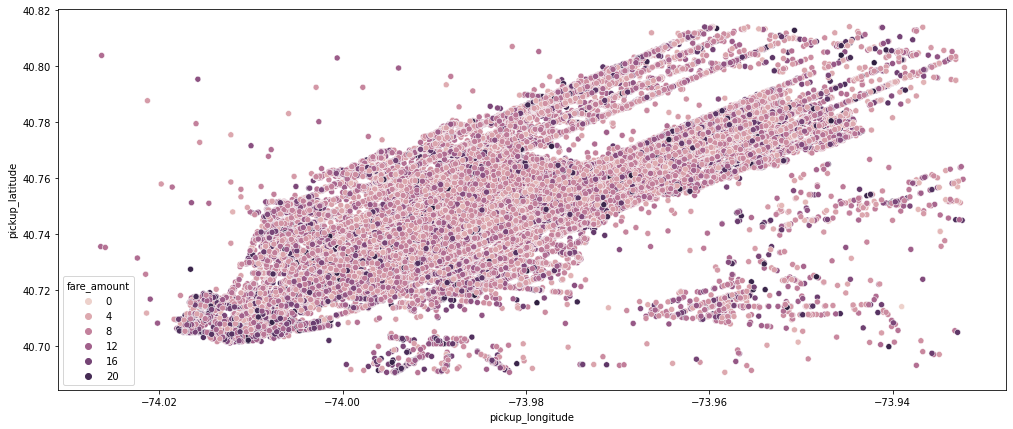

<Figure size 1296x576 with 0 Axes>

In [ ]:
sns.scatterplot(x='pickup_longitude', y= 'pickup_latitude', hue='fare_amount',data=df_data);
plt.figure(figsize=(18, 8))
plt.show()

### 4. Which drop locations have the highest fares?

<Figure size 1296x576 with 0 Axes>

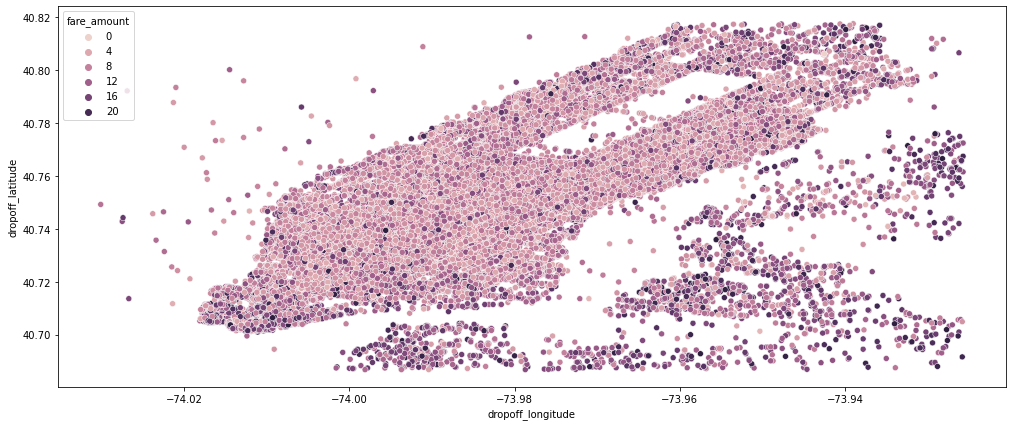

<Figure size 1296x576 with 0 Axes>

In [ ]:
sns.scatterplot(x='dropoff_longitude', y= 'dropoff_latitude',hue='fare_amount',data=df_data);
plt.figure(figsize=(18, 8))

# <font color='blue'>  14)  Data Exploration

### Plot the longitude and latitude per distance_miles with [3d interactive Plot]¶


In [ ]:
f = px.scatter_3d(df_data[:10000], x='pickup_latitude', y='pickup_longitude', z='distance_miles',
                    color='fare_amount')
f.show()

NOTE : We can navigate through the pickup co-ordinates by placing the cursor on the plot above.

### Fare amount vs Passenger count

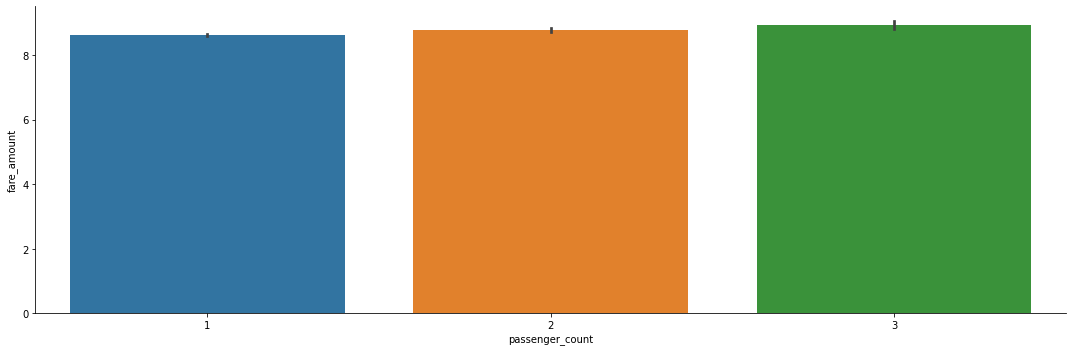

<Figure size 1008x504 with 0 Axes>

In [ ]:
sns.catplot(x="passenger_count", y="fare_amount", data=df_data, kind="bar", aspect=3)
sns.despine()
plt.figure(figsize = (14,7))
plt.show()

👉 We can observe the higher fare amount for passenger count of 3.

### Hour counts

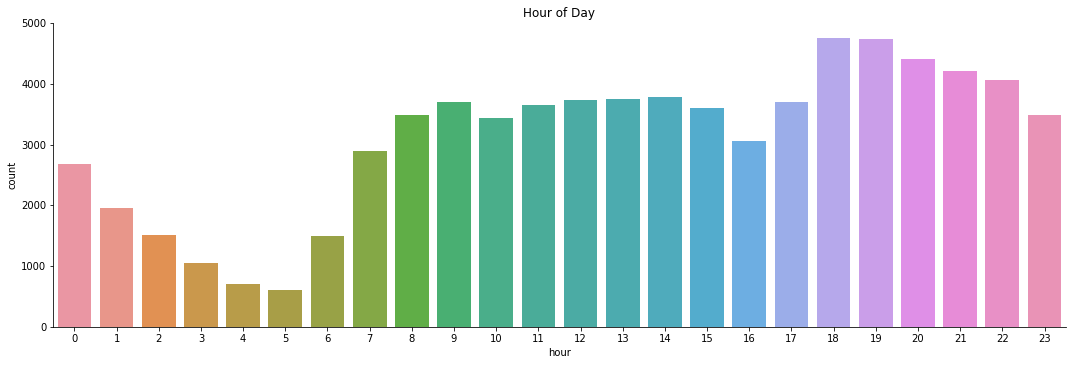

<Figure size 1008x504 with 0 Axes>

In [ ]:
sns.catplot(x="hour", kind="count", data=df_data, height=5, aspect=3);
sns.despine()
plt.title('Hour of Day');
plt.figure(figsize = (14,7))
plt.show()

👉 6 & 7 PM have the highest hour counts.

### Fare amount vs day

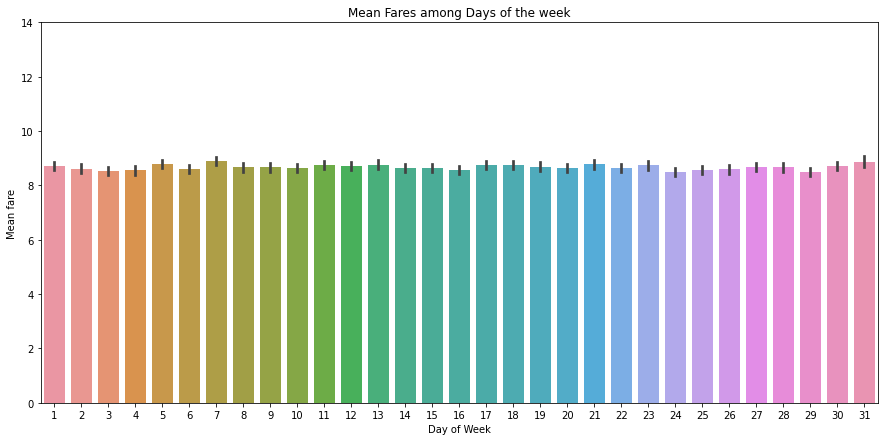

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='day', y="fare_amount",data=df_data)
plt.ylim(0, 14)
plt.title("Mean Fares among Days of the week")
plt.xlabel('Day of Week')
plt.ylabel('Mean fare')
plt.show()

👉 The plot is self explanatory

### Fare amount distribution

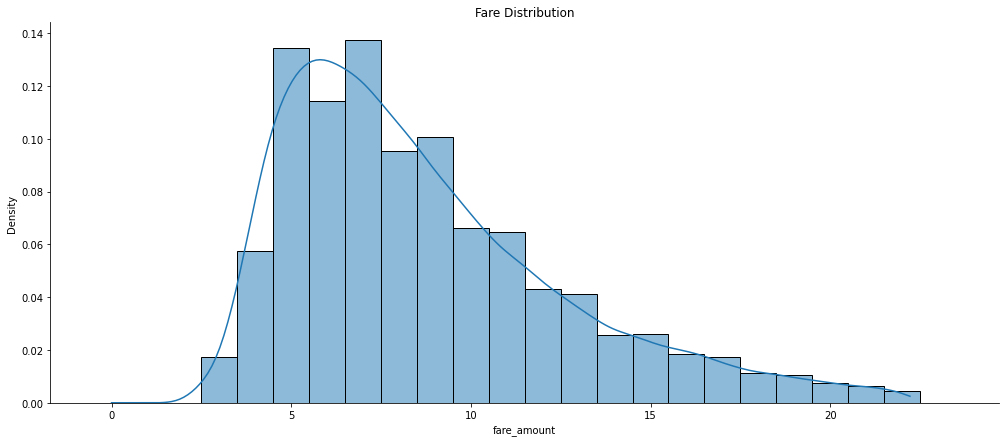

<Figure size 864x360 with 0 Axes>

In [ ]:
def plot_dist(series=df_data["fare_amount"], title="Fare Distribution"):
    sns.histplot(series, kde=True, stat='density', discrete=True)
    sns.despine()
    plt.title(title);
    plt.figure(figsize=(12,5))
    plt.show()
plot_dist()

👉 The fare amount varies mostly between 5 to 10 USD.

### Month vs Fare amount

In [ ]:
xy = df_data.groupby('month').sum().sort_values('fare_amount',ascending=False)
xy.head(10)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,distance_miles
month,,,,,,,,,,,
5,60031.62,-506479.2574,278993.8129,-506471.3049,278998.1561,8669,107735,21023,92989,202432,10153.2752
3,59216.53,-510768.7522,281356.0355,-510761.5227,281359.4816,8691,110560,20727,92999,207733,10085.6890
6,59216.36,-498046.6779,274348.8490,-498036.0298,274350.7399,8404,103710,20186,91048,199142,10046.4651
4,58882.45,-504408.8782,277850.7723,-504402.0657,277854.4082,8580,106849,20353,93453,200404,10035.1104
1,57825.75,-511210.7797,281604.9589,-511204.6734,281605.6135,8711,113125,21311,94498,203756,9906.5125
2,55405.24,-483173.6377,266158.3762,-483165.4960,266161.7869,8174,96524,19888,89111,194780,9397.9114
10,52420.30,-440414.9677,242600.5484,-440406.8088,242605.1391,7537,94893,18094,80692,175325,8779.4589
12,51417.70,-429167.2997,236408.2701,-429160.3853,236410.0175,7351,85758,17248,79680,171327,8382.7515
11,50484.33,-421325.6185,232088.2027,-421318.4224,232094.3437,7197,85240,17222,76976,169454,8376.2133


👉 March, April, May & June are the highest grossing months.

👉 This can be due to tourism during the spring/summer season.

### Hour vs Fare amount

In [ ]:
bc = df_data.groupby('hour').sum().sort_values('fare_amount',ascending=False)
bc.head(25)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,minute,month,distance_miles
hour,,,,,,,,,,,
18,41454.80,-352518.7888,194197.3228,-352517.5274,194195.6323,6057,74499,13514,143925,29346,6692.1473
19,40519.48,-350894.4867,193293.6566,-350890.6556,193293.9300,6106,74260,13787,139878,29624,6768.3524
20,38143.87,-326854.6160,180040.6207,-326850.7810,180037.7893,5705,67049,12865,127300,27350,6761.8530
21,36796.15,-311618.9269,171640.0914,-311606.9935,171645.5151,5540,66204,12203,122340,26649,6677.7664
22,35836.30,-300671.9795,165606.5286,-300657.4233,165611.9274,5317,63946,12088,120492,25876,6558.0849
14,33529.44,-280759.3374,154662.0518,-280756.6303,154665.7933,4769,60066,11525,112579,24035,5178.2361
13,32924.77,-277429.6670,152828.6312,-277428.3370,152829.6695,4701,60399,11596,110746,23335,5109.5048
12,32519.31,-276762.3596,152462.8171,-276763.1771,152459.6681,4652,58609,11177,110645,23406,4962.8609
9,32315.81,-274393.6656,151159.0208,-274399.5032,151155.0016,4323,57909,9866,110621,22896,5056.7115


👉 Maximum profit can be earned by taking out maximum number of taxis during peak hours at around 6pm to 7pm

### Day of week vs Fare amount

In [ ]:
dc= df_data.groupby('dayofweek').sum().sort_values('fare_amount',ascending=False)
dc.head(15)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,minute,month,distance_miles
dayofweek,,,,,,,,,,,
4,99795.43,-842579.8485,464131.1473,-842571.5670,464132.0705,14423,178758,155552,335861,70455,16533.3539
5,98573.98,-835485.7175,460201.5645,-835472.3786,460208.6398,15058,177887,151018,336721,69764,17187.4484
3,98484.11,-832365.0532,458513.7188,-832352.3361,458520.3584,13840,175879,157467,334686,69409,16284.4317
2,96196.65,-818086.3034,450653.3878,-818074.0435,450656.0913,13581,171148,153361,329379,69705,15796.4660
1,90113.04,-777615.8496,428364.9194,-777605.7794,428367.5957,12877,163112,148632,312792,66132,14894.2025
0,81887.46,-716364.2148,394616.4349,-716352.0201,394618.2942,11886,151445,135613,283587,60965,14135.7720
6,80995.21,-692552.6070,381468.5763,-692534.3723,381482.0315,12338,147874,112671,276662,58767,14647.1378


### *NOTE* : Day of the weeks ranges from 0 to 6.

👉 Tuesday,Wednesday,Thursday,Friday has the maximum earning.

👉 Saturday,Sunday & Monday has minimum earning.

### Pickup longitude & latitude vs Fare amount

In [ ]:
ef = df_data.groupby(['pickup_longitude','pickup_latitude']).sum().sort_values('fare_amount',ascending=False)
ef.head(10)

,,fare_amount,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,month,distance_miles
pickup_longitude,pickup_latitude,,,,,,,,,,
-73.9941,40.7512,542.0,-4364.9269,2404.7316,70,792,148,749,1578,394,78.0468
-73.9942,40.7511,323.0,-2515.3193,1385.8507,40,510,96,419,1099,195,55.3372
-73.9941,40.7511,284.4,-2219.4725,1222.8664,37,535,76,373,779,197,42.2298
-73.9915,40.7500,269.3,-1997.4243,1100.3457,31,421,64,357,737,158,37.7976
-73.9940,40.7513,237.6,-1923.5169,1059.6525,36,334,72,399,832,163,37.2695
-73.9623,40.7791,217.7,-1405.6460,774.3498,25,240,65,313,480,114,41.0708
-73.9940,40.7512,197.6,-1405.5860,774.3653,25,232,54,212,616,110,29.8325
-73.9914,40.7501,193.8,-1701.5904,937.3316,30,364,62,332,617,127,30.3089
-73.9942,40.7512,182.8,-1479.5244,815.2150,25,362,55,254,366,127,29.6233


👉 Pickup co-ordinates is showing almost the same places.

👉 Whereas, some dropoff co-ordinates showing high fare amount vary.

## Correlation between variables
👉 Correlation is the extent of linear relationship among numeric variables.

👉 It indicates the extent to which two variables increase or decrease in parallel.

👉 The value of a correlation coefficient ranges between -1 and 1

👉 Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated

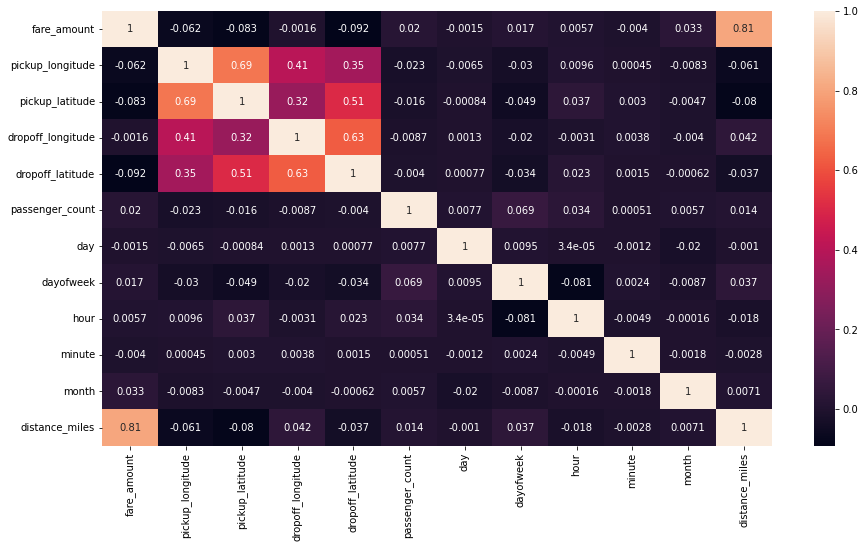

In [ ]:
pearson_corr = df_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = pearson_corr, annot = True)

In [ ]:
# listing correlations of features with target

correlations = abs(pearson_corr['fare_amount']).sort_values(ascending=False)
correlations

fare_amount          1.000000
distance_miles       0.807257
dropoff_latitude     0.092141
pickup_latitude      0.083134
pickup_longitude     0.062355
month                0.032703
passenger_count      0.019571
dayofweek            0.017316
hour                 0.005712
minute               0.004029
dropoff_longitude    0.001639
day                  0.001489
Name: fare_amount, dtype: float64

👉 Distance_miles has the highest correlation with target with Pearson coefficient of 0.807

## <font color='blue'> 16) Splitting into Train and Test data

In [ ]:
x=df_data.drop('fare_amount',axis=1)

y=df_data['fare_amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

# <font color='blue'> Model Building

We will build XGBoost and Random Forest Regressor first because the scaling
of features isn't required.

## <font color='blue'> XGBoost Regressor

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train.astype(int),y_train.astype(int))

[16:10:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb_y_pred_train=xgb_model.predict(x_train.astype(int))

In [ ]:
xgb_y_pred_test=xgb_model.predict(x_test.astype(int))

In [ ]:
print('Evaluating XGBoost Regressor Model \n')
print('\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_train,xgb_y_pred_train)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_train,xgb_y_pred_train),3))
print("MSE score :",round(metrics.mean_squared_error(y_train,xgb_y_pred_train),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_train,xgb_y_pred_train)),3))
print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_test,xgb_y_pred_test)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_test,xgb_y_pred_test),3))
print("MSE score :",round(metrics.mean_squared_error(y_test,xgb_y_pred_test),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_test,xgb_y_pred_test)),3))

Evaluating XGBoost Regressor Model 


--------------------Training Set Metrics--------------------
R2 Score : 0.792
MAE score : 1.7
MSE score : 5.679
RMSE score : 2.383

--------------------Testing Set Metrics--------------------
R2 Score : 0.793
MAE score : 1.704
MSE score : 5.709
RMSE score : 2.389


## <font color='blue'> Random Forest Regressor

In [ ]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf_y_pred_train=rf_model.predict(x_train)

In [ ]:
rf_y_pred_test=rf_model.predict(x_test)

In [ ]:
print('Evaluating Random Forest Regressor Model \n')
print('\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_train,rf_y_pred_train)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_train,rf_y_pred_train),3))
print("MSE score :",round(metrics.mean_squared_error(y_train,rf_y_pred_train),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_train,rf_y_pred_train)),3))
print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_test,rf_y_pred_test)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_test,rf_y_pred_test),3))
print("MSE score :",round(metrics.mean_squared_error(y_test,rf_y_pred_test),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_test,rf_y_pred_test)),3))

Evaluating Random Forest Regressor Model 


--------------------Training Set Metrics--------------------
R2 Score : 0.979
MAE score : 0.557
MSE score : 0.623
RMSE score : 0.789

--------------------Testing Set Metrics--------------------
R2 Score : 0.846
MAE score : 1.481
MSE score : 4.365
RMSE score : 2.089


## <font color='blue'> Scaling of the features using Standardisation

In [ ]:
scaler = StandardScaler()
df_data= scaler.fit_transform(df_data)

In [ ]:
df_data=pd.DataFrame(df_data) 

In [ ]:
df_data.columns=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','day','dayofweek','hour','minute','month','distance_miles']

In [ ]:
df_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,dayofweek,hour,minute,month,distance_miles
0,2.107345,-2.119314,-1.940132,0.080198,1.269442,-0.483290,-1.226824,-1.036454,0.375859,1.291134,-1.514891,3.730200
1,-0.759236,-0.053883,0.403801,-0.620040,-0.112693,1.368349,0.271731,-0.006418,-2.136729,0.309417,0.508663,-0.596904
2,-0.247346,-0.326793,-0.918177,-0.643578,0.217435,-0.483290,0.617551,1.023618,-1.508582,0.020677,-0.647654,0.267077
3,-0.861614,0.851682,0.717888,1.410063,1.348673,-0.483290,-0.765730,-1.036454,-1.037471,1.233386,-0.936733,-0.223301
4,0.878810,-1.188940,-0.988495,0.456797,0.221836,-0.483290,-1.111551,-0.006418,-0.723398,1.175638,-1.514891,0.872554


In [ ]:
x_scaled=df_data.drop(['fare_amount'],axis=1)

y_scaled=df_data['fare_amount']

x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled=train_test_split(x_scaled,y_scaled,test_size=0.3,random_state=50)

## <font color='blue'> Assumptions of the Linear Regression

## <font color='blue'> Assumption-1: Normality of Residuals
As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.


In [ ]:
Xc_scaled = sm.add_constant(x_scaled)

In [ ]:

model = sm.OLS(y_scaled.astype(float), Xc_scaled.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                 1.299e+04
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:10:55   Log-Likelihood:                -65866.
No. Observations:               74546   AIC:                         1.318e+05
Df Residuals:                   74534   BIC:                         1.319e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -9.511e-15      0.002  -4.44e-12      1.000      -0.004       0.004
pickup_longitude     -0.0025      0.003     -0.809      0.418      -0.009       0.004
pickup_latitude       0.0181      0.003      5.519      0.000       0.012       0.025
dropoff_longitude     0.0076      0.003      2.597      0.009       0.002       0.013
dropoff_latitude     -0.0766      0.003    -24.848      0.000      -0.083      -0.071
passenger_count       0.0086      0.002      4.007      0.000       0.004       0.013
day               -3.474e-05      0.002     -0.016      0.987      -0.004       0.004
dayofweek            -0.0132      0.002     -6.116      0.000      -0.017      -0.009
hour                  0.0197      0.002      9.150      0.000       0.015       0.024
minute               -0.0016      0.002     -0.736      0.462      -0.006       0.003
month                 0.0269      0.002     12.523      0.000       0.023       0.031
distance_miles        0.8060      0.002    372.779      0.000       0.802       0.810
==============================================================================
Omnibus:                    21507.714   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107191.440
Skew:                           1.314   Prob(JB):                         0.00
Kurtosis:                       8.254   Cond. No.                         3.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

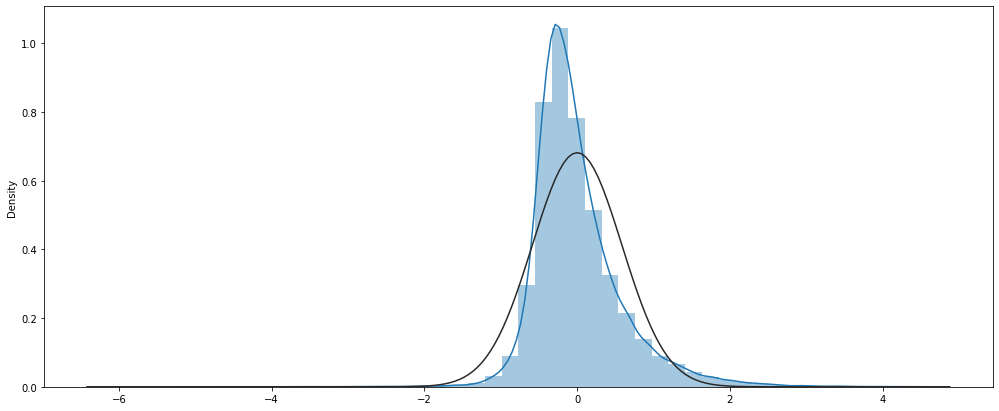

<Figure size 1080x360 with 0 Axes>

In [ ]:
residuals = model.resid
norm.fit(residuals)
sns.distplot(residuals, fit=norm)
plt.figure(figsize=(15, 5))
plt.show()

In [ ]:
np.mean(residuals)

5.785086143929866e-17

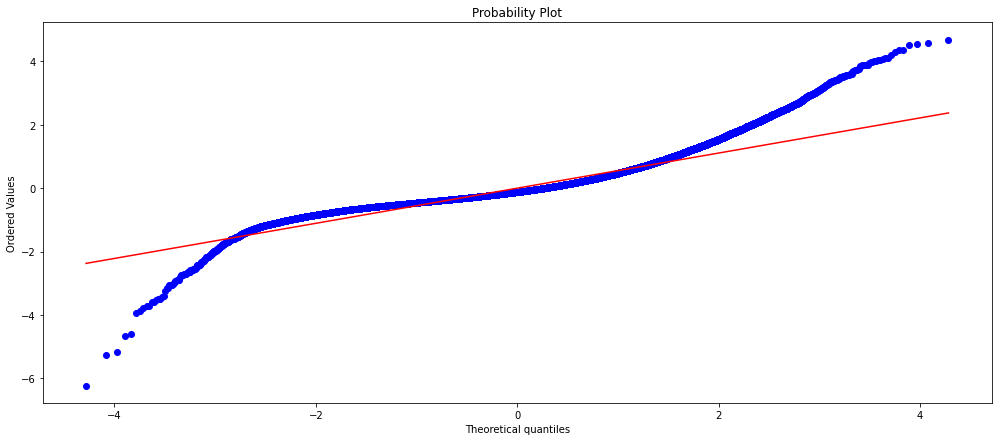

In [ ]:
stats.probplot(residuals, plot=plt)
plt.show()

 Perform Jarque Bera test to check normality of the residuals

H0 : The data is normally distributed
    
Ha : The data is not normally distributed

In [ ]:
stat, p = jarque_bera(residuals)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=107191.440, p-value=0.000
The data is not normally distributed (reject H0)


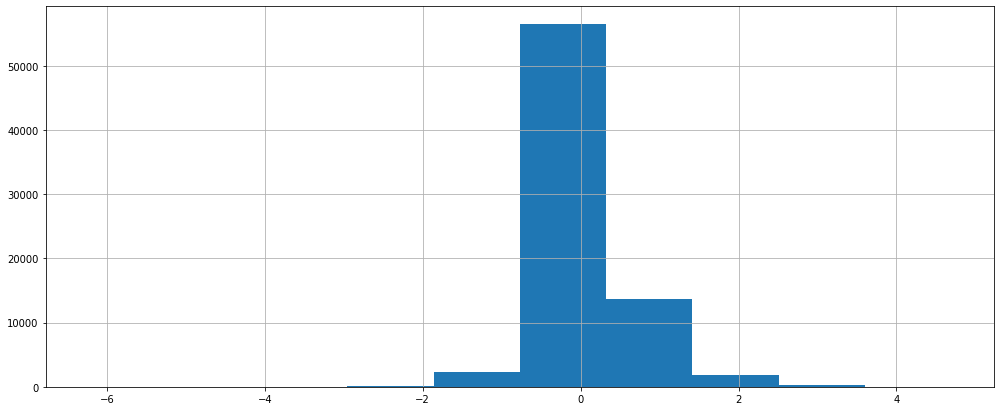

In [ ]:
residuals.hist()

# <font color='blue'> Let us try to transform the distribution of the residuals.
 
##  Transformation using sqrt method

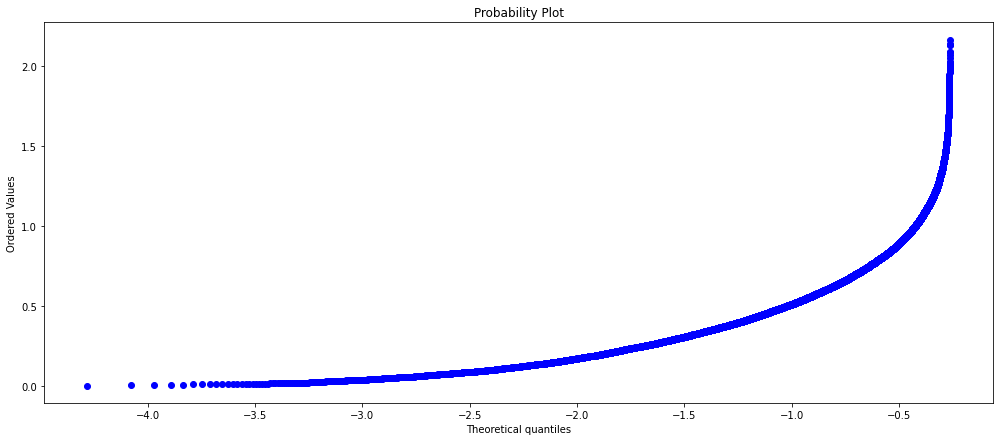

In [ ]:
ab=np.sqrt(residuals)

stats.probplot(ab, plot=plt)
plt.show()

In [ ]:
stat, p = jarque_bera(ab)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=nan, p-value=nan
The data is not normally distributed (reject H0)


👉 The p-value is nan. So we have enough evidence to reject the null hypothesis.
  
👉 It can be concluded that the residuals are not normally distributed.

In [ ]:
ab

0             NaN
1             NaN
2             NaN
3             NaN
4        0.514652
           ...   
74541         NaN
74542         NaN
74543         NaN
74544         NaN
74545         NaN
Length: 74546, dtype: float64

In [ ]:
np.mean(ab)

0.6423363837343643

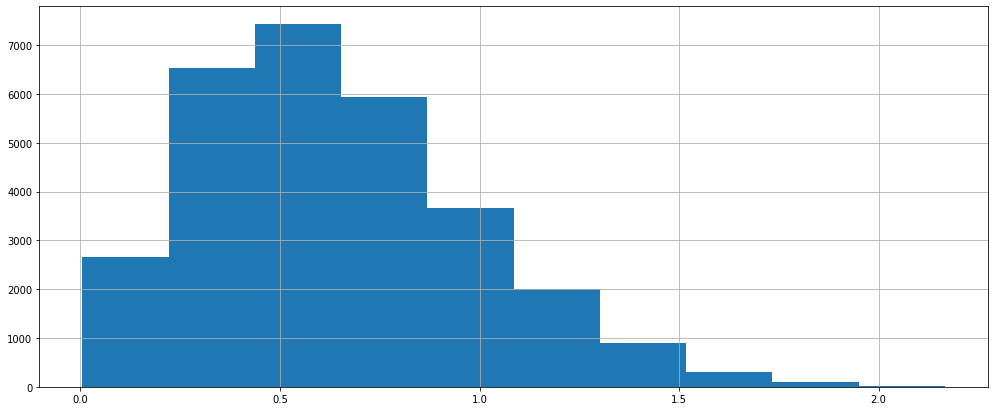

In [ ]:
ab.hist()

### Transformation using log method

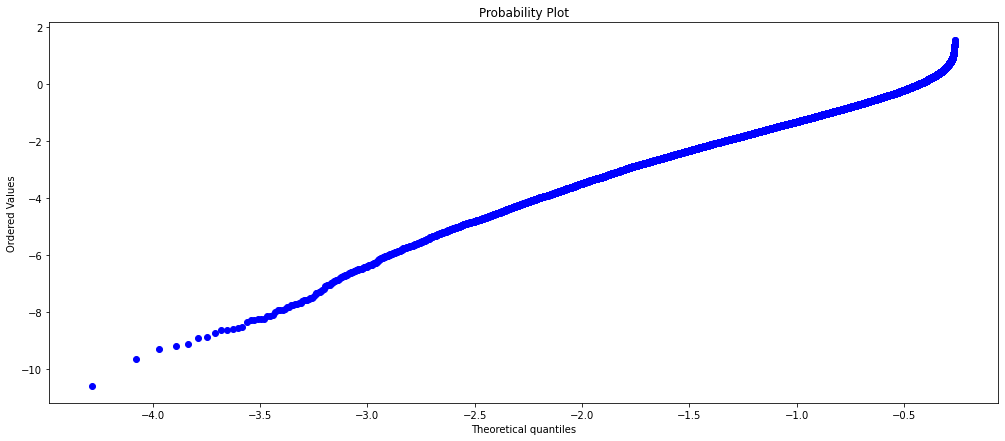

In [ ]:
cd=np.log(residuals)

stats.probplot(cd, plot=plt)
plt.show()

In [ ]:
stat, p = jarque_bera(cd)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=nan, p-value=nan
The data is not normally distributed (reject H0)


In [ ]:
cd

0            NaN
1            NaN
2            NaN
3            NaN
4       -1.32853
          ...   
74541        NaN
74542        NaN
74543        NaN
74544        NaN
74545        NaN
Length: 74546, dtype: float64

In [ ]:
np.mean(cd)

-1.2299419215691259

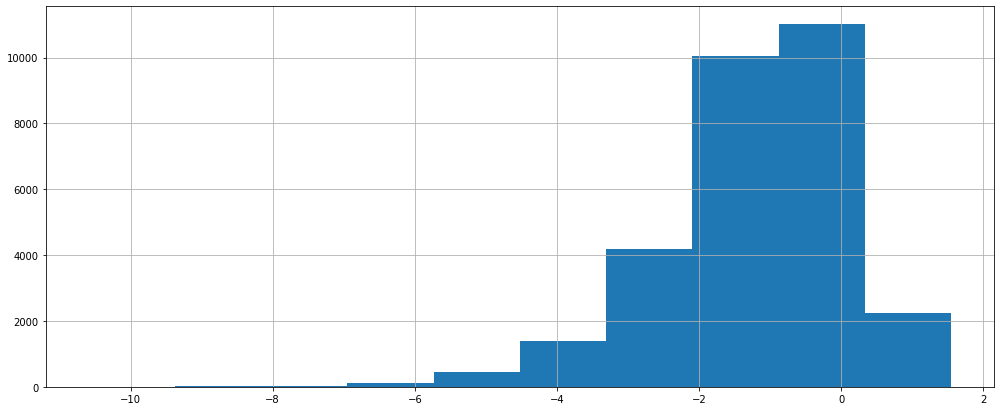

In [ ]:
cd.hist()

👉 Here, we can see that after the SQRT and LOG transformation of the residuals the statistical hypothesis test suggests that,

👉 Residuals are not normally distributed.


## <font color='blue'> Assumption-2 There is no perfect multicollinearity.
As the degree of multi-collinearity increases, estimates of the coefficients become unstable and the standard errors for the coefficients can get wildly inflated.

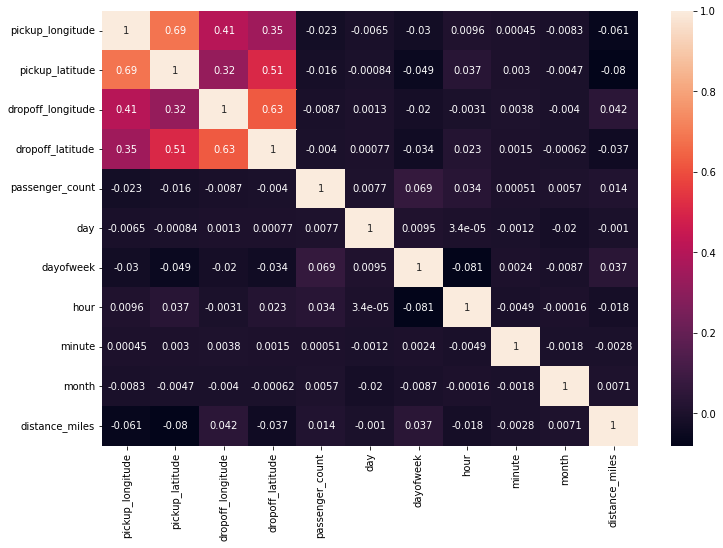

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(x_scaled.corr(), annot=True)
plt.show()

In [ ]:
vf = [vif(Xc_scaled.astype(int).values, i) for i in range(Xc_scaled.astype(int).shape[1])]
pd.DataFrame(vf, index=Xc_scaled.astype(int).columns, columns=['vif'])

,vif
const,1.236570
pickup_longitude,1.419473
pickup_latitude,1.493493
dropoff_longitude,1.322377
dropoff_latitude,1.397138
passenger_count,1.005308
day,1.000507
dayofweek,1.012567
hour,1.007816
minute,1.000124


👉 We can observe that the independent variables are not highly correlated with each other.

## <font color='blue'> Assumption-3 Test for Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

In [ ]:
model = sm.OLS(y_scaled.astype(int), Xc_scaled.astype(int)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     5256.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:10:58   Log-Likelihood:                -58034.
No. Observations:               74546   AIC:                         1.161e+05
Df Residuals:                   74534   BIC:                         1.162e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0061      0.002      2.826      0.005       0.002       0.010
pickup_longitude      0.0009      0.003      0.259      0.795      -0.006       0.008
pickup_latitude      -0.0113      0.003     -3.285      0.001      -0.018      -0.005
dropoff_longitude     0.0135      0.003      4.068      0.000       0.007       0.020
dropoff_latitude     -0.0798      0.003    -24.274      0.000      -0.086      -0.073
passenger_count       0.0092      0.003      3.409      0.001       0.004       0.015
day                   0.0005      0.003      0.170      0.865      -0.006       0.007
dayofweek            -0.0080      0.003     -3.036      0.002      -0.013      -0.003
hour                  0.0222      0.003      8.091      0.000       0.017       0.028
minute               -0.0025      0.003     -0.867      0.386      -0.008       0.003
month                 0.0220      0.003      7.316      0.000       0.016       0.028
distance_miles        0.6624      0.003    235.716      0.000       0.657       0.668
==============================================================================
Omnibus:                    17569.989   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89934.337
Skew:                           1.048   Prob(JB):                         0.00
Kurtosis:                       7.956   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

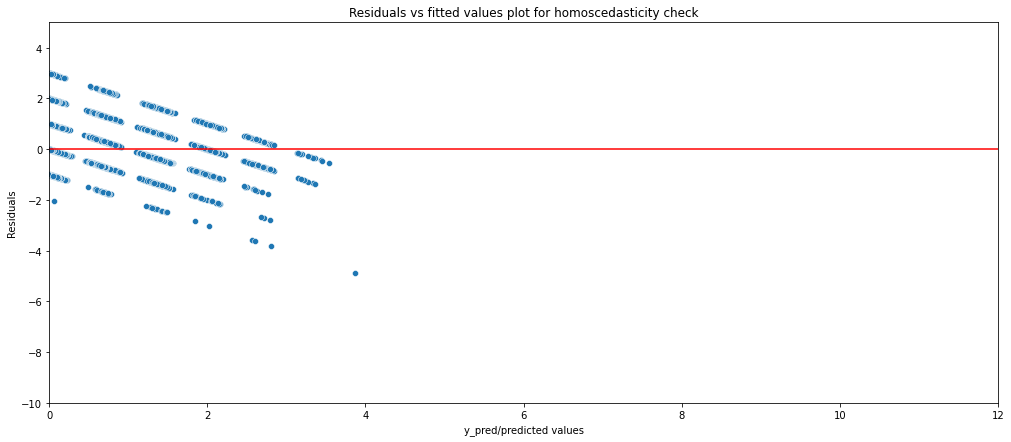

In [ ]:
residuals = model.resid
y_pred = model.predict(Xc_scaled.astype(int))

p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,5)
plt.xlim(0,12)
p = sns.lineplot([0,86],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

H0 : Error terms are homoscedastic

Ha : Error terms are not heteroscedastic.

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y=residuals, x=Xc_scaled.astype(int))
lzip(name, test)

[('F statistic', 0.9883683581249076), ('p-value', 0.870594011099635)]

👉Since p value is more than 0.05 in Goldfeld Quandt Test, we fail to reject the null hypothesis.

👉 We can conclude that the error terms are homoscedastic.

## <font color='blue'> Assumption-4 No autocorrelation between the residuals.

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.

In [ ]:
model = sm.OLS(y_scaled.astype(int), Xc_scaled.astype(int)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     5256.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:10:59   Log-Likelihood:                -58034.
No. Observations:               74546   AIC:                         1.161e+05
Df Residuals:                   74534   BIC:                         1.162e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0061      0.002      2.826      0.005       0.002       0.010
pickup_longitude      0.0009      0.003      0.259      0.795      -0.006       0.008
pickup_latitude      -0.0113      0.003     -3.285      0.001      -0.018      -0.005
dropoff_longitude     0.0135      0.003      4.068      0.000       0.007       0.020
dropoff_latitude     -0.0798      0.003    -24.274      0.000      -0.086      -0.073
passenger_count       0.0092      0.003      3.409      0.001       0.004       0.015
day                   0.0005      0.003      0.170      0.865      -0.006       0.007
dayofweek            -0.0080      0.003     -3.036      0.002      -0.013      -0.003
hour                  0.0222      0.003      8.091      0.000       0.017       0.028
minute               -0.0025      0.003     -0.867      0.386      -0.008       0.003
month                 0.0220      0.003      7.316      0.000       0.016       0.028
distance_miles        0.6624      0.003    235.716      0.000       0.657       0.668
==============================================================================
Omnibus:                    17569.989   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89934.337
Skew:                           1.048   Prob(JB):                         0.00
Kurtosis:                       7.956   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

👉 Durbin-Watson Statistic=1.976
 
####👉 Since this value is very close to 2. Hence we can conclude that there is almost no autocorrelation

## <font color='blue'> Assumption-5 Linearity of Relationship 
Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters.


This assumption is about the appropriateness of the model. If the model is a good fit, we expect to see residuals are around a horizontal line.

In [ ]:
y_pred = model.predict(Xc_scaled)

H0: fit of model using full sample = fit of model using a central subset (linear relationship)

H1: fit of model using full sample is worse compared  to fit of model using a central subset 

In [ ]:
name = ['F statistic', 'p-value']
test_1=sm.stats.diagnostic.linear_rainbow(model)
lzip(name, test_1)

[('F statistic', 0.9709890534186474), ('p-value', 0.9977555189763275)]

👉 As we can see the p-value is more than the 0.05 so we fail to reject the null hypothesis.

👉 We can conclude the linear relationship.


*NOTE:* It is important to note that not all the assumptions are satisfied in the real life implementation.




# **<font color='blue'> 18) Model Building**

## **<font color='blue'> Multiple Linear Regression**

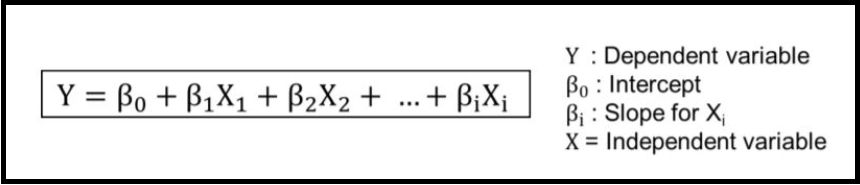

In [ ]:
MLR = LinearRegression().fit(x_train_scaled,y_train_scaled)

In [ ]:
MLR_pred_train = MLR.predict(x_train_scaled)
MLR_pred_test = MLR.predict(x_test_scaled)

In [ ]:
print('Evaluating Multiple Linear Regression Model \n')
print('The Coeffecient of the Regresion Model is',MLR.coef_)
print('\n')
print('The Intercept of the Regresion Model is',MLR.intercept_)
print('\n')
print('\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_train_scaled,MLR_pred_train)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_train_scaled,MLR_pred_train),3))
print("MSE score :",round(metrics.mean_squared_error(y_train_scaled,MLR_pred_train),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_train_scaled,MLR_pred_train)),3))
print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_test_scaled,MLR_pred_test)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_test_scaled,MLR_pred_test),3))
print("MSE score :",round(metrics.mean_squared_error(y_test_scaled,MLR_pred_test),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_test_scaled,MLR_pred_test)),3))

Evaluating Multiple Linear Regression Model 

The Coeffecient of the Regresion Model is [-0.00458648  0.01651159  0.00888866 -0.07721579  0.00765941  0.00338752
 -0.01459382  0.01747887 -0.00145518  0.02786872  0.80349732]


The Intercept of the Regresion Model is -0.0009007098946656269



--------------------Training Set Metrics--------------------
R2 Score : 0.809
MAE score : 0.42
MSE score : 0.344
RMSE score : 0.587

--------------------Testing Set Metrics--------------------
R2 Score : 0.814
MAE score : 0.417
MSE score : 0.339
RMSE score : 0.582


# **<font color='blue'> Ridge Regression**

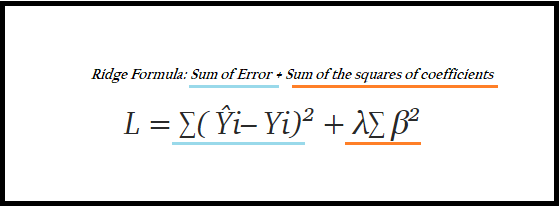

In [ ]:
RLR = Ridge().fit(x_train_scaled,y_train_scaled)

In [ ]:
RLR_pred_train = RLR.predict(x_train_scaled)
RLR_pred_test = RLR.predict(x_test_scaled)

In [ ]:
print('Evaluating Ridge Regression Model \n')
print('The Coeffecient of the Regresion Model is',RLR.coef_)
print('\n')
print('The Intercept of the Regresion Model is',RLR.intercept_)
print('\n')
print('\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_train_scaled,RLR_pred_train)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_train_scaled,RLR_pred_train),3))
print("MSE score :",round(metrics.mean_squared_error(y_train_scaled,RLR_pred_train),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_train_scaled,RLR_pred_train)),3))
print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_test_scaled,RLR_pred_test)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_test_scaled,RLR_pred_test),3))
print("MSE score :",round(metrics.mean_squared_error(y_test_scaled,RLR_pred_test),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_test_scaled,RLR_pred_test)),3))

Evaluating Ridge Regression Model 

The Coeffecient of the Regresion Model is [-0.00458597  0.01650868  0.00888834 -0.07721335  0.00765941  0.00338745
 -0.01459304  0.01747836 -0.00145518  0.02786826  0.80348177]


The Intercept of the Regresion Model is -0.0009006775060623569



--------------------Training Set Metrics--------------------
R2 Score : 0.809
MAE score : 0.421
MSE score : 0.344
RMSE score : 0.587

--------------------Testing Set Metrics--------------------
R2 Score : 0.814
MAE score : 0.417
MSE score : 0.339
RMSE score : 0.582


## **<font color='blue'> Lasso Regression Model**

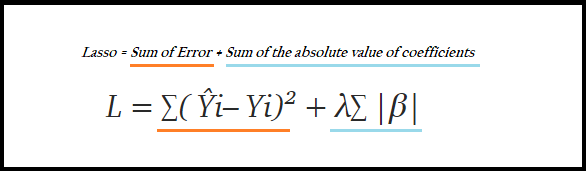

In [ ]:
LLR = Lasso().fit(x_train_scaled,y_train_scaled)

In [ ]:
LLR_pred_train = LLR.predict(x_train_scaled)
LLR_pred_test = LLR.predict(x_test_scaled)

In [ ]:
print('Evaluating Lasso Regressor Model \n')
print('The Coeffecient of the Regresion Model is',LLR.coef_)
print('\n')
print('The Intercept of the Regresion Model is',LLR.intercept_)
print('\n')
print('\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_train_scaled,LLR_pred_train)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_train_scaled,LLR_pred_train),3))
print("MSE score :",round(metrics.mean_squared_error(y_train_scaled,LLR_pred_train),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_train_scaled,LLR_pred_train)),3))
print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_test_scaled,LLR_pred_test)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_test_scaled,LLR_pred_test),3))
print("MSE score :",round(metrics.mean_squared_error(y_test_scaled,LLR_pred_test),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_test_scaled,LLR_pred_test)),3))


Evaluating Lasso Regressor Model 

The Coeffecient of the Regresion Model is [-0. -0. -0. -0.  0.  0.  0.  0. -0.  0.  0.]


The Intercept of the Regresion Model is 0.00016890959000936628



--------------------Training Set Metrics--------------------
R2 Score : 0.0
MAE score : 0.789
MSE score : 0.997
RMSE score : 0.999

--------------------Testing Set Metrics--------------------
R2 Score : nan
MAE score : 0.79
MSE score : 1.007
RMSE score : 1.003


## **<font color='blue'> Comparing the evaluation of the model with Visualization**
## <font color='blue'> (Before Hyperparameter Tuning)

In [ ]:
index=['RMSE_Train', 'RMSE_Test']
EM=pd.DataFrame({'Multiple Linear Regression':[0.587,0.582],'Ridge Regressor':[0.587,0.582],'Lasso Regressor':[0.999,1.003],'XGBoost Regressor':[2.383,2.389],'Random Forest Regressor':[0.789,2.089]},index=index)

*NOTE* : Here, EM is the abbreviation of Evaluation Matrix.

In [ ]:
EM

,Multiple Linear Regression,Ridge Regressor,Lasso Regressor,XGBoost Regressor,Random Forest Regressor
RMSE_Train,0.587,0.587,0.999,2.383,0.789
RMSE_Test,0.582,0.582,1.003,2.389,2.089


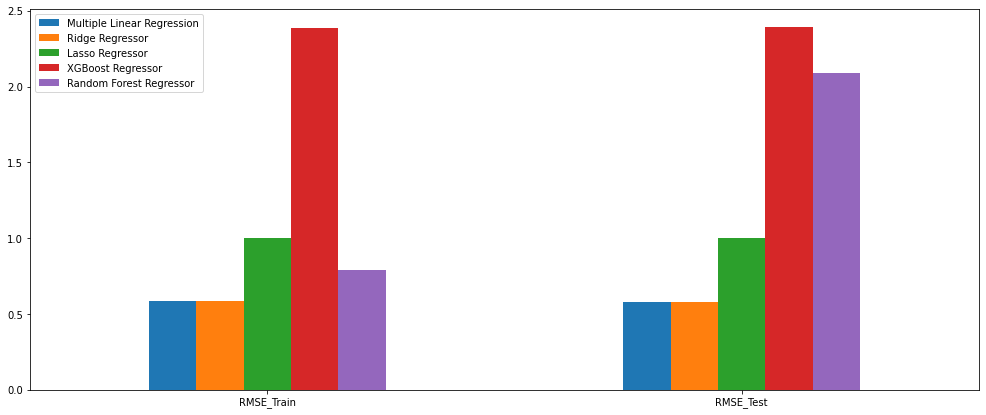

In [ ]:
ax = EM.plot.bar(rot=0)

According to the bar plot, we can conclude that:

👉 Random Forest regressor is not a good choice as it is clearly overfitting.

👉 XGBoost Regressor shows very high RMSE scores which we don't want but we can try using hyperparameter tuning and check for the reduced scores.

👉 Lasso Regressor is showing slightly higher RMSE score which is also not desirable but we can still try using hyperparameter tuning on it. 

👉 Multiple Linear Regression and Ridge Regressor show stable scores and much less RMSE scores than the other Regressors.
But we can still try using hyperparameter tuning on Ridge Regressor for the optimal results.


# <font color='blue'> Hyperparameter Tuning using RandomizedSearch CV



## <font color='blue'> XGBoost

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
n_estimators
learning_rate=['0.05','0.1','0.2','0.3','0.4','0.5']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_child_weight=[3,4,5,6,7]
colsample_bytree=[0.2,0.4,0.6,0.8]
subsample=[0.1,0.3,0.5,0.7,0.9]

In [ ]:
xgb_regressor_random={'n_estimators':n_estimators,
               'learning_rate':learning_rate,
               'max_depth':max_depth,
               'subsample':subsample,
               'colsample_bytree':colsample_bytree,
               'min_child_weight':min_child_weight}

In [ ]:
print(xgb_regressor_random)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.1, 0.3, 0.5, 0.7, 0.9], 'colsample_bytree': [0.2, 0.4, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [ ]:
# Create base model to find out the best params

xgb_regressor_hyper=xgb.XGBRegressor()

In [ ]:
xgb_regressor_random= RandomizedSearchCV(estimator = xgb_regressor_hyper, param_distributions = xgb_regressor_random,scoring=None,n_iter = 100,n_jobs=-1,cv = 3, verbose=3)

In [ ]:
xgb_hyper_fit=xgb_regressor_random.fit(x_train.astype(int), y_train.astype(int))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[20:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_hyper_fit.best_params_

{'colsample_bytree': 0.2,
 'learning_rate': '0.05',
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 1100,
 'subsample': 0.1}

In [ ]:
xgb_model_2= xgb.XGBRegressor(subsample=0.1, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05,colsample_bytree=0.2)

In [ ]:
xgb_model_2.fit(x_train.astype(int),y_train.astype(int))

[20:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, max_depth=5,
             min_child_weight=3, n_estimators=1100, subsample=0.1)

In [ ]:
xgb_y_pred_train1 = xgb_model_2.predict(x_train.astype(int))

In [ ]:
xgb_y_pred_test1 = xgb_model_2.predict(x_test.astype(int))

In [ ]:
print('Evaluating XGBoost Regressor Model Post Hyperparamter tuning \n')
print('\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_train,xgb_y_pred_train1)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_train,xgb_y_pred_train1),3))
print("MSE score :",round(metrics.mean_squared_error(y_train,xgb_y_pred_train1),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_train,xgb_y_pred_train1)),3))
print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_test,xgb_y_pred_test1)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_test,xgb_y_pred_test1),3))
print("MSE score :",round(metrics.mean_squared_error(y_test,xgb_y_pred_test1),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_test,xgb_y_pred_test1)),3))

Evaluating XGBoost Regressor Model Post Hyperparamter tuning 


--------------------Training Set Metrics--------------------
R2 Score : 0.799
MAE score : 1.693
MSE score : 5.602
RMSE score : 2.367

--------------------Testing Set Metrics--------------------
R2 Score : 0.792
MAE score : 1.712
MSE score : 5.732
RMSE score : 2.394


## <font color='blue'> Ridge Regressor

In [ ]:
parameters1= [{'alpha': [0.00001,0.0001,0.001, 0.01, 0.1,1.0,0.0]}]
parameters1

[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 0.0]}]

In [ ]:
RLR_hyper = Ridge()

In [ ]:
RLR_random=RandomizedSearchCV(estimator = RLR_hyper, param_distributions = parameters1,scoring=None,n_iter = 100,n_jobs=-1,cv = 3, verbose=3)

In [ ]:
RLR_hyper_fit=RLR_random.fit(x_train_scaled.astype(int),y_train_scaled.astype(int))

Fitting 3 folds for each of 7 candidates, totalling 21 fits


In [ ]:
RLR_hyper_fit.best_params_

{'alpha': 1.0}

In [ ]:
RLR_model_2=Ridge(alpha=1.0)

In [ ]:
RLR_model_2.fit(x_train_scaled.astype(int),y_train_scaled.astype(int))

Ridge()

In [ ]:
RLR_y_pred_train1 = RLR_model_2.predict(x_train_scaled.astype(int))

In [ ]:
RLR_y_pred_test1 = RLR_model_2.predict(x_test_scaled.astype(int))

In [ ]:
print('Evaluating Ridge Regressor Model Post Hyperparamter tuning \n')
print('\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_train_scaled,RLR_y_pred_train1)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_train_scaled,RLR_y_pred_train1),3))
print("MSE score :",round(metrics.mean_squared_error(y_train_scaled,RLR_y_pred_train1),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_train_scaled,RLR_y_pred_train1)),3))
print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_test_scaled,RLR_y_pred_test1)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_test_scaled,RLR_y_pred_test1),3))
print("MSE score :",round(metrics.mean_squared_error(y_test_scaled,RLR_y_pred_test1),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_test_scaled,RLR_y_pred_test1)),3))

Evaluating Ridge Regressor Model Post Hyperparamter tuning 


--------------------Training Set Metrics--------------------
R2 Score : 0.635
MAE score : 0.619
MSE score : 0.595
RMSE score : 0.771

--------------------Testing Set Metrics--------------------
R2 Score : 0.64
MAE score : 0.618
MSE score : 0.594
RMSE score : 0.771


## <font color='blue'> Lasso Regressor

In [ ]:
LLR_hyper = Lasso()

In [ ]:
LLR_random=RandomizedSearchCV(estimator = LLR_hyper, param_distributions = parameters1,scoring=None,n_iter = 100,n_jobs=-1,cv = 3, verbose=3)

In [ ]:
LLR_hyper_fit=LLR_random.fit(x_train_scaled.astype(int),y_train_scaled.astype(int))

Fitting 3 folds for each of 7 candidates, totalling 21 fits


In [ ]:
LLR_hyper_fit.best_params_

{'alpha': 0.0001}

In [ ]:
LLR_model_2 = Lasso(alpha=0.0001)

In [ ]:
LLR_model_2.fit(x_train_scaled.astype(int),y_train_scaled.astype(int))

Lasso(alpha=0.0001)

In [ ]:
LLR_y_pred_train1 = LLR_model_2.predict(x_train_scaled.astype(int))

In [ ]:
LLR_y_pred_test1 = LLR_model_2.predict(x_test_scaled.astype(int))

In [ ]:
print('Evaluating Lasso Regressor Model Post Hyperparamter tuning  \n')
print('The Coeffecient of the Regresion Model is',LLR.coef_)
print('\n')
print('The Intercept of the Regresion Model is',LLR.intercept_)
print('\n')
print('\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_train_scaled,LLR_y_pred_train1)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_train_scaled,LLR_y_pred_train1),3))
print("MSE score :",round(metrics.mean_squared_error(y_train_scaled,LLR_y_pred_train1),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_train_scaled,LLR_y_pred_train1)),3))
print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('R2 Score :',round(np.sqrt(metrics.r2_score(y_test_scaled,LLR_y_pred_test1)),3))
print("MAE score :",round(metrics.mean_absolute_error(y_test_scaled,LLR_y_pred_test1),3))
print("MSE score :",round(metrics.mean_squared_error(y_test_scaled,LLR_y_pred_test1),3))
print("RMSE score :",round(np.sqrt(mean_squared_error(y_test_scaled,LLR_y_pred_test1)),3))

Evaluating Lasso Regressor Model Post Hyperparamter tuning  

The Coeffecient of the Regresion Model is [-0. -0. -0. -0.  0.  0.  0.  0. -0.  0.  0.]


The Intercept of the Regresion Model is 0.00016890959000936628



--------------------Training Set Metrics--------------------
R2 Score : 0.635
MAE score : 0.619
MSE score : 0.595
RMSE score : 0.771

--------------------Testing Set Metrics--------------------
R2 Score : 0.64
MAE score : 0.618
MSE score : 0.594
RMSE score : 0.771


## <font color='blue'> Comparing the evaluation of the model with Visualization 
## <font color='blue'> (Post Hyperparameter tuning) 

**NOTE : ** Here Before and After refers to,

 Before Hypeparameter tuning & After Hypeparameter tuning.

In [ ]:
index=['RMSE_Train', 'RMSE_Test']
comparison1=pd.DataFrame({'Multiple Linear Regression':[0.587,0.582],'Ridge Regressor(Before)':[0.587,0.582],'Ridge Regressor(After)':[0.771,0.771],'XGBoost Regressor(Before)':[2.383,2.389],'XGBoost Regressor(After)':[2.367,2.394],'Lasso Regressor(Before)':[0.999,1.003],'Lasso Regressor(After)':[0.771,0.771]},index=index)

In [ ]:
comparison1

,Multiple Linear Regression,Ridge Regressor(Before),Ridge Regressor(After),XGBoost Regressor(Before),XGBoost Regressor(After),Lasso Regressor(Before),Lasso Regressor(After)
RMSE_Train,0.587,0.587,0.771,2.383,2.367,0.999,0.771
RMSE_Test,0.582,0.582,0.771,2.389,2.394,1.003,0.771


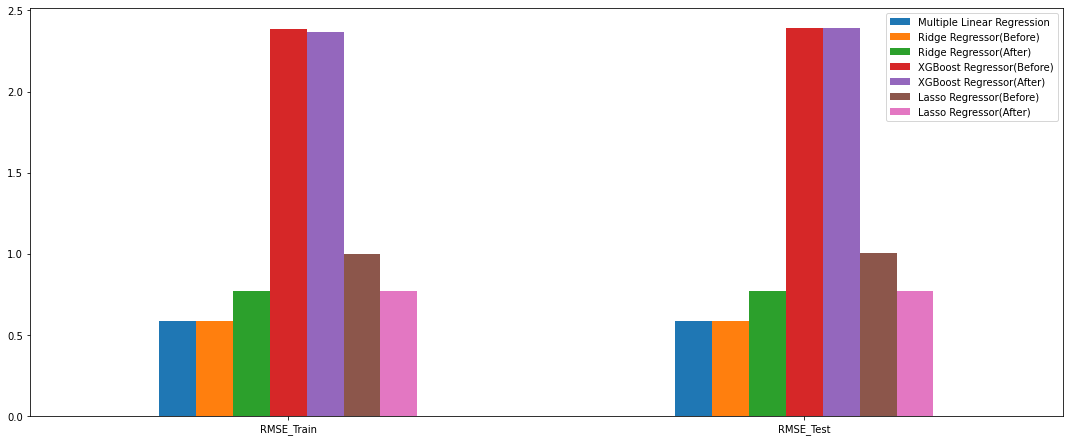

In [ ]:
ax2 = comparison1.plot.bar(rot=0)
#figure(figsize=(58,16), dpi=890)
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# <font color='blue'>Project Outcomes & Conclusions :-

👉 The Dataset was large enough totalling 100,000 samples & after preprocessing 25.45% of the datasamples were dropped.

👉 Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.

### Model Conclusion

Lower values RMSE scores are expected.

👉 XGBoost Regressor & Lasso Regressor (Before & After the hyperparameter tuning) cannot be considered due to higher RMSE scores.

👉 Ridge Regressor (After hyperparameter tuning) gives slightly higher RMSE scores.
So we can think of Ridge Regressor (Before hyperparameter tuning)

👉 Therefore, Multiple Linear Regressor & Ridge Regressor with the default parameter settings can be considered as a better fit model because of lesser RMSE scores as compared to other models.
